# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Download the stopwords dataset

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Importing Dataset into jupyter notebook

In [10]:
data = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [11]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Exploring Dataset

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [14]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [16]:
data.shape

(5572, 5)

# Data Cleaning

In [14]:
column_drop=['Unnamed: 2','Unnamed: 3','Unnamed: 4']
data.drop(columns=column_drop, inplace=True)

In [15]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [17]:
data[data.duplicated()]

,v1,v2
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [18]:
#Drop duplicated values

data=data.drop_duplicates()
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5169 non-null   object
 1   v2      5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [21]:
# Description of data

data.describe()

,v1,v2
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [22]:
data['v1'].value_counts()

ham     4516
spam     653
Name: v1, dtype: int64

# Data Visualisation


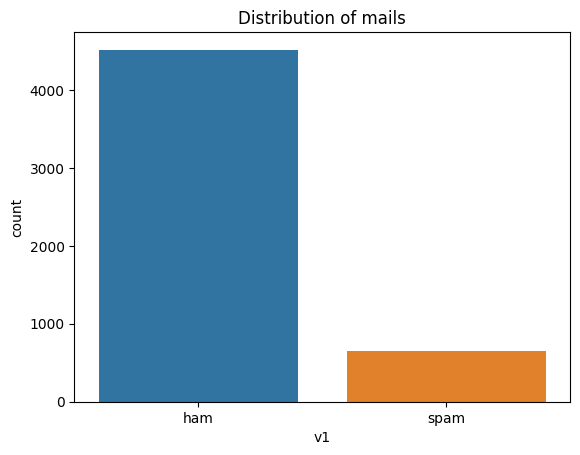

In [24]:
sns.countplot(data=data, x='v1')
plt.xlabel('v1')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()

# Data Preprocessing


In [27]:
# Convert the "Category" column values to numerical representation(0 for "spam",1 for "ham")

data.loc[data["v1"] == "spam", "Category"] = 0
data.loc[data["v1"] == "ham", "Category"] = 1

data.head()

,v1,v2,Category
0,ham,"Go until jurong point, crazy.. Available only ...",1.0
1,ham,Ok lar... Joking wif u oni...,1.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.0
3,ham,U dun say so early hor... U c already then say...,1.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",1.0


In [28]:
X = data['v2']
Y = data['Category']

In [29]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5169, dtype: object

In [30]:
Y

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
5567    0.0
5568    1.0
5569    1.0
5570    1.0
5571    1.0
Name: Category, Length: 5169, dtype: float64

# Splitting the data into train and test data

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=2)

In [32]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5169,)
(3618,)
(1551,)


# Feature Extraction


In [33]:
# Create a TF-IDF vectorizer to convert text messages to numerical features

feature_extraction = TfidfVectorizer(min_df=1, stop_words='english',lowercase=True)

# Convert the training and testing text messages into numerical features using TF-IDF

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Convert the target values into 0 and 1

Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

In [34]:
print(X_train_features)

  (0, 274)	0.28469841570534354
  (0, 757)	0.2382703692823207
  (0, 309)	0.28469841570534354
  (0, 5479)	0.28469841570534354
  (0, 1666)	0.18521698912601275
  (0, 3176)	0.28469841570534354
  (0, 6726)	0.16969158756163835
  (0, 6243)	0.28469841570534354
  (0, 603)	0.24274243659325892
  (0, 2157)	0.1929056107731498
  (0, 6682)	0.2059490803121428
  (0, 6265)	0.15269186047504035
  (0, 5701)	0.24274243659325892
  (0, 6566)	0.16515206653974776
  (0, 6468)	0.23079712301516783
  (0, 2768)	0.21505634607080928
  (0, 4120)	0.22760511302317224
  (0, 234)	0.20290236667023745
  (0, 6626)	0.18521698912601275
  (1, 1536)	0.5888338190512723
  (1, 6486)	0.5280141801118141
  (1, 3501)	0.4067379480769643
  (1, 2132)	0.45720892460283746
  (2, 5579)	0.4697175168946937
  (2, 2524)	0.6743730717061566
  :	:
  (3612, 4940)	0.4429207609150278
  (3612, 3694)	0.38321599910309895
  (3612, 6141)	0.4110511297018481
  (3613, 3066)	1.0
  (3614, 782)	0.6262002443728721
  (3614, 2608)	0.468640976347078
  (3614, 5588)	0.36

In [35]:
print(Y_train)

2118    0
1019    1
1881    1
2575    1
4858    1
       ..
3534    1
1124    1
2628    1
3833    1
2694    1
Name: Category, Length: 3618, dtype: int32


# Model Training


In [36]:
model = LogisticRegression()
model.fit(X_train_features,Y_train)

LogisticRegression()

In [37]:
# Model evaluation
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

# Print accuracy
print('Accuracy on training data: {} %'.format(accuracy_on_training_data * 100))
print('Accuracy on test data: {} %'.format(accuracy_on_test_data * 100))

Accuracy on training data: 96.01990049751244 %
Accuracy on test data: 95.80915538362346 %


In [38]:
# Test the model with some custom email messages

input_mail = ["Congratulations on your recent achievement! Well done."]
input_data_features = feature_extraction.transform(input_mail)
prediction = model.predict(input_data_features)

if (prediction)[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Ham Mail


In [39]:
# Test the model with some custom email messages

input_mail = ["Congratulations! You have won $10000 from an online game. Click the link to claim your prize now!"]
input_data_features = feature_extraction.transform(input_mail)
prediction = model.predict(input_data_features)

if (prediction)[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Spam Mail


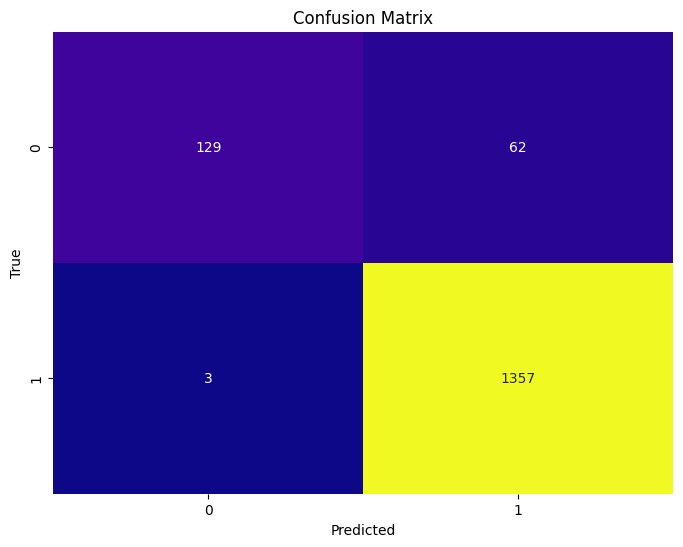

In [40]:
# Data Visualisation - Confusion Matrix

cm = confusion_matrix(Y_test,prediction_on_test_data)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap="plasma", cbar=False)
plt.xlabel("Predicted")
plt.ylabel('True')
plt.title("Confusion Matrix")
plt.show()